In [1]:
from sklearn.datasets import load_wine 
import pandas as pd
wine = load_wine() 
df = pd.DataFrame(data = wine.data , columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
# train_test_split
from sklearn.model_selection import train_test_split
X = wine.data 
y = wine.target
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [3]:
# cross validation for optimal K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 16) 
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())  
optimal_k = k_range[np.argmax(cv_scores)]
print("Optimal k:", optimal_k)


Optimal k: 1


In [4]:
# Train the model 
knn = KNeighborsClassifier(n_neighbors= optimal_k , metric="euclidean")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     class_0       0.75      0.86      0.80        14
     class_1       0.85      0.79      0.81        14
     class_2       0.71      0.62      0.67         8

    accuracy                           0.78        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36

Confusion Matrix:
[[12  0  2]
 [ 3 11  0]
 [ 1  2  5]]


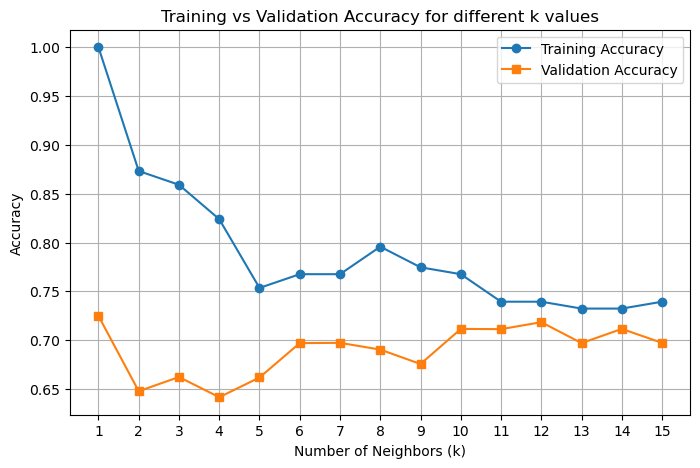

In [6]:
import matplotlib.pyplot as plt
k_range = range(1, 16)
train_scores = []
val_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())

# Plotting
plt.figure(figsize=(8,5))
plt.plot(k_range, train_scores, marker='o', label='Training Accuracy')
plt.plot(k_range, val_scores, marker='s', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for different k values')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()
